In [2]:
# import modules
%matplotlib notebook
from numpy import *
from pylab import *
from scipy.io import loadmat,savemat
from scipy.ndimage import gaussian_filter,median_filter
import mat73
from sklearn.preprocessing import StandardScaler
import umap.plot
import json

import os

import cv2

ModuleNotFoundError: No module named 'mat73'

In [30]:
# test fl
fl = loadmat("F:/skin/10X/fl.mat")['fl']
print(fl[0])

F:/skin/10X/14 Control-3/1


In [31]:
flc = [
    'F:/skin/10X/14 Control-3/1',
    'F:/skin/10X/14 Control-3/2',
    'F:/skin/10X/14 Control-3/3',
    'F:/skin/10X/14 Control-2/2',
    'F:/skin/10X/14 Control-2/3',
    'F:/skin/10X/14 Control-1/1',
    'F:/skin/10X/14 Control-1/2',
    'F:/skin/10X/14 Control-1/3',
    'F:/skin/10X/9 Control-3/2',
    'F:/skin/10X/9 Control-2/1',
    'F:/skin/10X/9 Control-2/2',
    'F:/skin/10X/9 Control-2/3',
    'F:/skin/10X/9 Control-1/1',
    'F:/skin/10X/9 Control-1/2',
    'F:/skin/10X/9 Control-1/3',
    'F:/skin/10X/7 Control-3/1',
    'F:/skin/10X/7 Control-3/2',
    'F:/skin/10X/7 Control-3/3',
    'F:/skin/10X/7 Control-2/1',
    'F:/skin/10X/7 Control-2/2',
    'F:/skin/10X/7 Control-2/3',
    'F:/skin/10X/7 Control-1/3',
    'F:/skin/10X/5 Control-3/1',
    'F:/skin/10X/5 Control-3/2',
    'F:/skin/10X/5 Control-3/3',
    'F:/skin/10X/5 Control-2/1',
    'F:/skin/10X/5 Control-2/2',
    'F:/skin/10X/5 Control-2/3',
    'F:/skin/10X/5 Control-1/1',
    'F:/skin/10X/5 Control-1/2',
    'F:/skin/10X/5 Control-1/3',
]

In [32]:
# T file
flt = [
     'F:/skin/10X/14 T-2/1',
    'F:/skin/10X/14 T-2/2',
    'F:/skin/10X/14 T-2/3',
    'F:/skin/10X/14 T-1/1',
    'F:/skin/10X/14 T-1/2',
    'F:/skin/10X/14 T-1/3',
    'F:/skin/10X/9 T-3/1',
    'F:/skin/10X/9 T-3/2',
    'F:/skin/10X/9 T-3/3',
    'F:/skin/10X/9 T-2/1',
    'F:/skin/10X/9 T-2/3',
    'F:/skin/10X/9 T-1/1',
    'F:/skin/10X/9 T-1/3',
    'F:/skin/10X/7 T-3/1',
    'F:/skin/10X/7 T-3/2',
    'F:/skin/10X/7 T-3/3',
    'F:/skin/10X/7 T-2/1',
    'F:/skin/10X/7 T-2/2',
    'F:/skin/10X/7 T-2/3',
    'F:/skin/10X/7 T-1/1',
    'F:/skin/10X/7 T-1/2',
    'F:/skin/10X/7 T-1/3',
    'F:/skin/10X/5 T-3/1',
    'F:/skin/10X/5 T-3/3',
    'F:/skin/10X/5 T-2/1',
    'F:/skin/10X/5 T-2/2',
    'F:/skin/10X/5 T-2/3',
]

In [33]:
fl = flc + flt

# Calculate pixel numbers

In [ ]:
def Calculate_pixnum(Cluster_1 ,roi_num=31):
    """
    Calculate pixel numbers of specific cluster
    Cluster_1: int list, specific cluster include super pixel
    roi_num: int
    pixnum: int list, pixel numbers of cluster in roi
    """
    pt = 0
    pixnum = []

    for t in range(0,roi_num*1024+1):
        if (t%1024)==0:
            ind = t//1024 - 1
            inx = ind + 1
            if inx < roi_num:
                sup_pix = loadmat(fl[inx]+'/no_emp_km_labels.mat')['ne_km_labels']
            if t!=0:
                pixnum.append(pt)
            pt = 0
        if t in Cluster_1:
            pix_num = len(zeros(sup_pix.shape[:2])[sup_pix==(t%1024)])
            pt += pix_num
    return pixnum

In [ ]:
cluster_labels_ = loadmat("F:/skin/10X/cluster_labels0.3_100.mat")['cluster_labels_']
cluster_labels_ = cluster_labels[0]

In [27]:
# calculate pixnums in all clusters
cluster_labels = cluster_labels_.copy()
pixnums = []

for i in range(0, cluster_labels_.max()+1):
    obj_clt = i
    Cluster_1 = []
    for i in range(len(cluster_labels)):
        if cluster_labels[i] == obj_clt:
            Cluster_1.append(i)
    pixnum = Calculate_pixnum(Cluster_1,roi_num=len(fl))
    pixnums.append(pixnum)
# savemat("F:/skin/10X/pixnums.mat",{'pixnums':pixnums})

F:/skin/10X/14 Control-3/1
F:/skin/10X/14 Control-3/2
F:/skin/10X/14 Control-3/3
F:/skin/10X/14 Control-2/2
F:/skin/10X/14 Control-2/3
F:/skin/10X/14 Control-1/1
F:/skin/10X/14 Control-1/2
F:/skin/10X/14 Control-1/3
F:/skin/10X/9 Control-3/2
F:/skin/10X/9 Control-2/1
F:/skin/10X/9 Control-2/2
F:/skin/10X/9 Control-2/3
F:/skin/10X/9 Control-1/1
F:/skin/10X/9 Control-1/2
F:/skin/10X/9 Control-1/3
F:/skin/10X/7 Control-3/1
F:/skin/10X/7 Control-3/2
F:/skin/10X/7 Control-3/3
F:/skin/10X/7 Control-2/1
F:/skin/10X/7 Control-2/2
F:/skin/10X/7 Control-2/3
F:/skin/10X/7 Control-1/3
F:/skin/10X/5 Control-3/1
F:/skin/10X/5 Control-3/2
F:/skin/10X/5 Control-3/3
F:/skin/10X/5 Control-2/1
F:/skin/10X/5 Control-2/2
F:/skin/10X/5 Control-2/3
F:/skin/10X/5 Control-1/1
F:/skin/10X/5 Control-1/2
F:/skin/10X/5 Control-1/3
F:/skin/10X/14 T-2/1
F:/skin/10X/14 T-2/2
F:/skin/10X/14 T-2/3
F:/skin/10X/14 T-1/1
F:/skin/10X/14 T-1/2
F:/skin/10X/14 T-1/3
F:/skin/10X/9 T-3/1
F:/skin/10X/9 T-3/2
F:/skin/10X/9 T-3/3


In [40]:
pixnums = loadmat("F:/skin/10X/pixnums.mat")['pixnums']

# Correlation

In [36]:
# generate days
# T 6/7/9/4 26
# Control  8/7/7/9 31
num = 1
day14 = repeat(14, 6*num)
day9 = repeat(9,7*num)
day7 = repeat(7,9*num)
day5 = repeat(5,4*num)
dayst = concatenate((day14, day9, day7, day5))
day14 = repeat(14, 8*num)
day9 = repeat(9,7*num)
day7 = repeat(7,7*num)
day5 = repeat(5,9*num)
daysc = concatenate((day14, day9, day7, day5))
days = concatenate((daysc, dayst))

In [1]:
num = 1
day14 = repeat(14, 6*num)

NameError: name 'repeat' is not defined

In [45]:
pearsons = []
mis = []
from sklearn.feature_selection import mutual_info_classif
for i in range(0,cluster_labels_.max()+1):
    pearson = corrcoef(pixnum[-26:],dayst)
    pixnum = array(pixnums[i])
    mi = mutual_info_classif(pixnum[-26:].reshape(-1,1),dayst)
    pearsons.append(abs(pearson[0,1]))
    mis.append(mi)
# savemat("F:/skin/10X/Cpearson.mat",{'Cpearson':Cpearson})
# savemat("F:/skin/10X/Cmis.mat",{'Cmis':Cmis})

In [46]:
Cpearson=loadmat("F:/skin/10X/Cpearson.mat")['Cpearson']
Cmis=loadmat("F:/skin/10X/Cmis.mat")['Cmis']
Tmis=loadmat("F:/skin/10X/Tmis.mat")['Tmis']
Tpearson=loadmat("F:/skin/10X/Tpearson.mat")['Tpearson']

# Graph

In [47]:
# rearrange clusters
y_1 = zeros((18))
y_2 = zeros((18))
f18to6 = [1,4,8,12,2,0,10,15,17,5,3,6,13,11,7,9,16,14]
Y1 = array(Cpearson).reshape(-1)
Y2 = array(Cmis).reshape(-1)
for i in range(0,18):
    y_1[i] = Y1[f18to6[i]]
    y_2[i] = Y2[f18to6[i]]

<IPython.core.display.Javascript object>


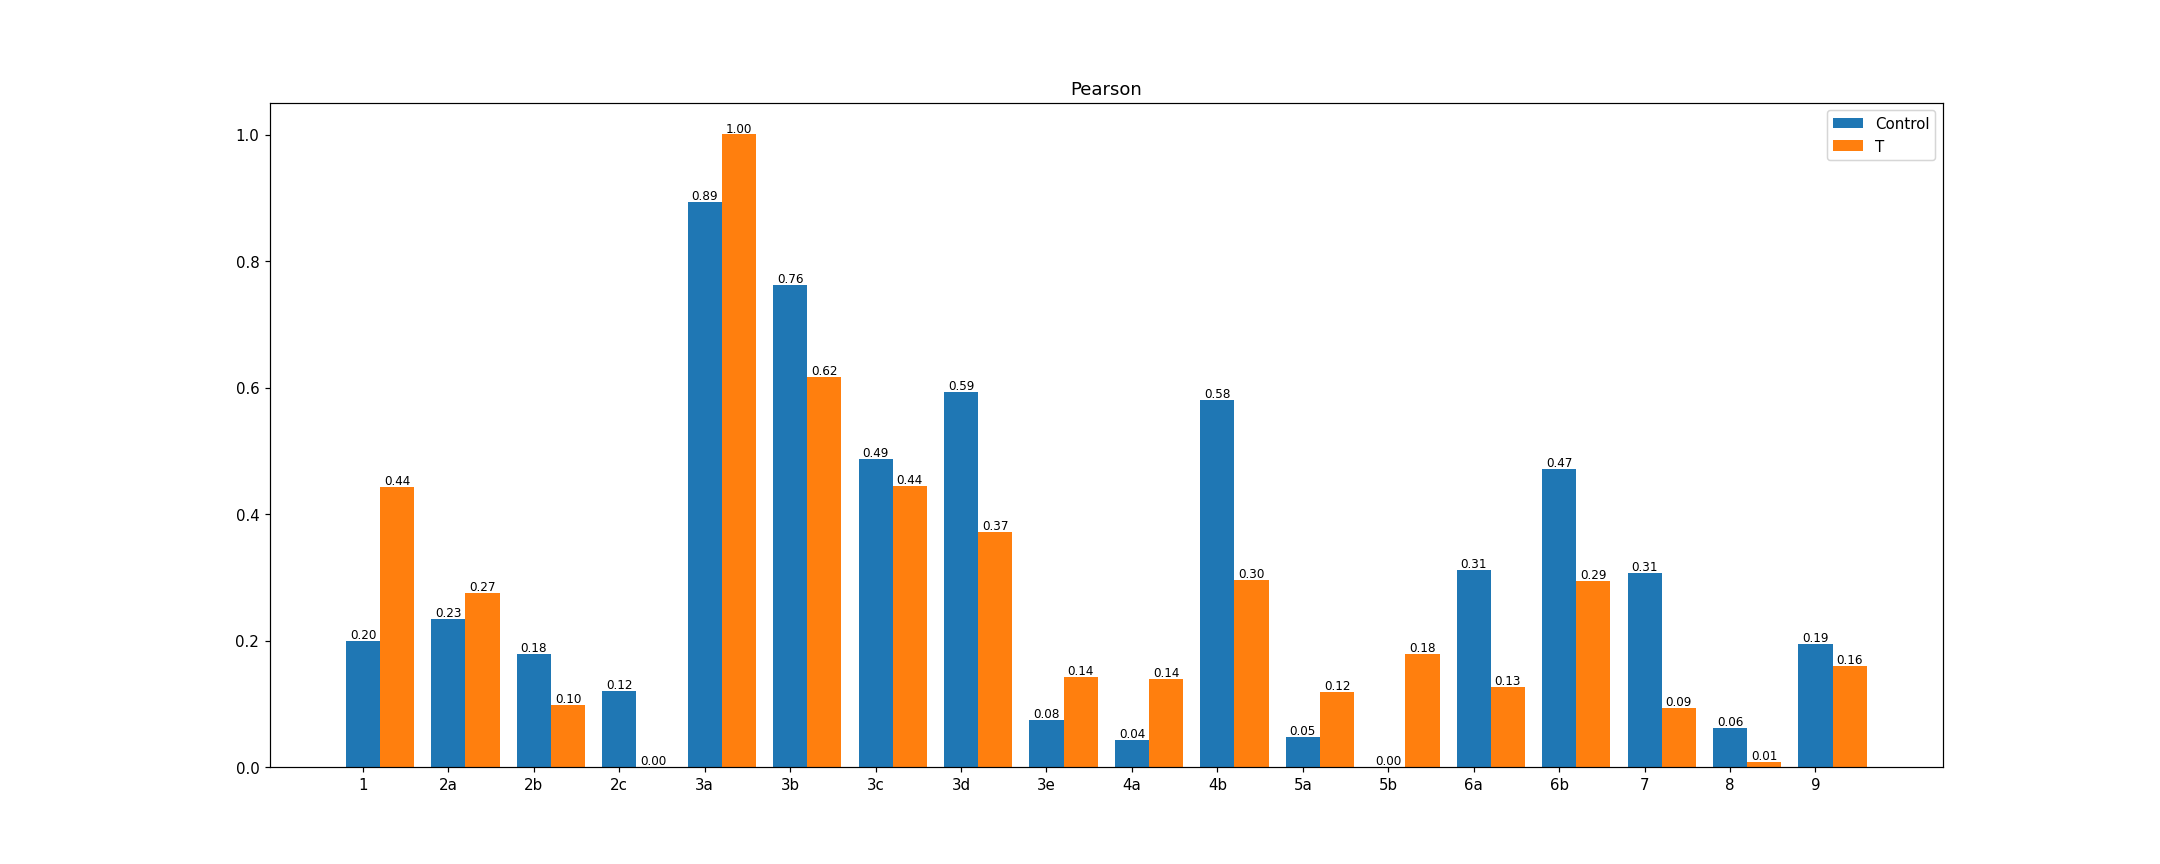

In [49]:
# paint correlation graph
bar_width = 0.4
x_1 = np.arange(0, 18, 1)
x_2 = [i+bar_width for i in x_1]

plt.figure(figsize=(20,8),dpi=80)
plt.bar(x_1,y_1,width=bar_width,label='Control')
plt.bar(x_2,y_2,width=bar_width,label='T')
ticklabel = ['1','2a','2b','2c','3a','3b','3c','3d','3e','4a','4b','5a','5b','6a','6b','7','8','9']
my_x_ticks = np.arange(0,18,1)
plt.xticks(my_x_ticks, ticklabel)
plt.title("Pearson")
legend()
for x,y in zip(x_1,y_1):
    #ha : horizontal alignment
    #va : vertical alignment
    plt.text(x ,y+0.02,'%.2f'%y,ha = 'center',va='top',fontsize=8)
 
for x,y in zip(x_2,y_2):
    # ha : horizontal alignment
    # va : vertical alignment
    plt.text(x,y+0.02,'%.2f'%(y),ha='center',va='top', fontsize=8)
    
# p-value 0.05
# plt.axhline(y=0.05, color='r', linestyle='-')